In [8]:
#Classification

import torch
from torchvision import models, transforms
from PIL import Image

# ---------------------------
# 1. Load pretrained model
# ---------------------------
weights = models.ResNet18_Weights.DEFAULT
model = models.resnet18(weights=weights)
model.eval()

# ---------------------------
# 2. Preprocessing for ImageNet
# ---------------------------
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# ---------------------------
# 3. ImageNet category names
# ---------------------------
idx_to_label = weights.meta["categories"]

# ---------------------------
# 4. Load your image
# ---------------------------
img_path = "Lab_9_images/cat_classification.jpeg"
image = Image.open(img_path).convert("RGB")
input_tensor = preprocess(image).unsqueeze(0)

# ---------------------------
# 5. Inference
# ---------------------------
with torch.no_grad():
    output = model(input_tensor)
    _, predicted_idx = torch.max(output, 1)
    label = idx_to_label[predicted_idx.item()]

print("Predicted class:", label)

Predicted class: tiger cat



image 1/1 c:\Users\yuvar\Projects\Computer Vision\lab 9\Lab_9_images\cat_classification_1.png: 448x640 1 cat, 24.2ms
Speed: 1.6ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


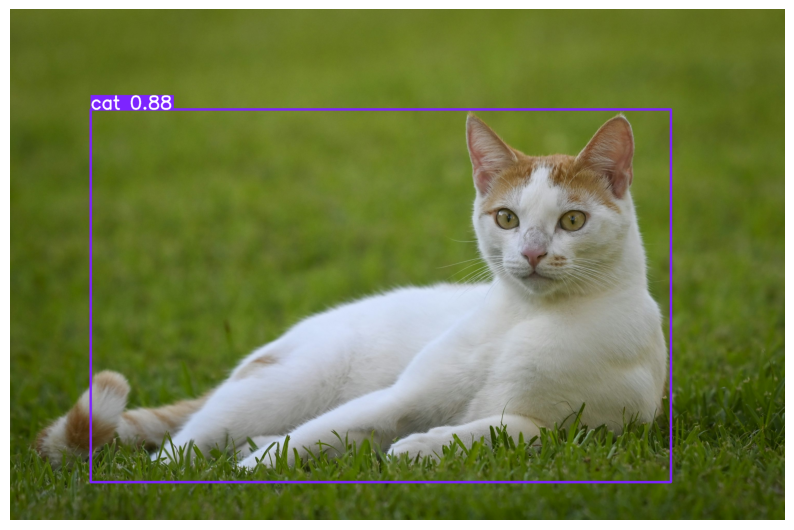

In [ ]:
# Detection
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# ---------------------------
# 1. Load pretrained YOLOv8
# ---------------------------
model = YOLO("yolov8n.pt")

# ---------------------------
# 2. Run inference on GPU
# ---------------------------
img_path = "images\cat_classification_1.png"
results = model(img_path, device='cpu')  # or device=0 for first GPU

# ---------------------------
# 3. Get annotated image
# ---------------------------
annotated = results[0].plot()

# Convert BGR → RGB for display
annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

# ---------------------------
# 4. Display in Jupyter
# ---------------------------
plt.figure(figsize=(10, 10))
plt.imshow(annotated_rgb)
plt.axis("off")
plt.show()



image 1/1 c:\Users\yuvar\Projects\Computer Vision\lab 9\Lab_9_images\cat_classification_1.png: 448x640 1 cat, 27.5ms
Speed: 1.2ms preprocess, 27.5ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


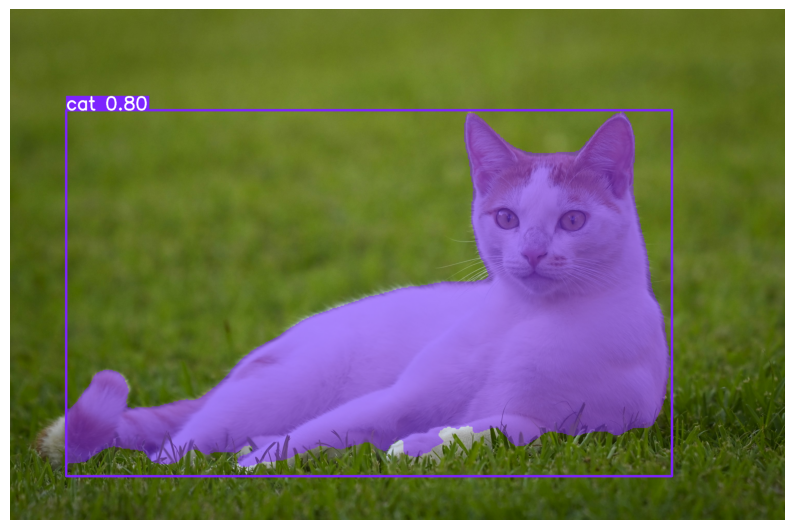

In [ ]:
#Segmentation
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# ---------------------------
# 1. Load pretrained YOLOv8 segmentation model
# ---------------------------
model = YOLO("yolov8n-seg.pt")     # nano version (fastest)
# Other options: yolov8s-seg.pt, yolov8m-seg.pt, etc.

# ---------------------------
# 2. Run segmentation inference
# ---------------------------
img_path = "images\cat_classification_1.png"        # <-- replace with your image
results = model(img_path,device='cpu')

# ---------------------------
# 3. Get annotated segmentation image
# ---------------------------
annotated = results[0].plot()      # returns BGR numpy array

annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

# ---------------------------
# 4. Display in Jupyter Notebook
# ---------------------------
plt.figure(figsize=(10, 10))
plt.imshow(annotated_rgb)
plt.axis("off")
plt.show()